# Working with Data to research Air Quality in the United States, a homework assignment for July 17, 2017

In [4]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import Polygon
%matplotlib inline
import fiona

In [5]:
states = gpd.read_file("/Users/amandajames/Desktop/14-homework-powerplants/cb_2016_us_state_500k/cb_2016_us_state_500k.shp")
states.crs = {'init': 'epsg:5071'}
states.head(10)

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
1,0400000US02,1477946266785,245390495931,02,00,Alaska,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5..."
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3..."
3,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ..."
4,0400000US06,403501101370,20466718403,06,00,California,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ..."
5,0400000US08,268429343790,1175112870,08,00,Colorado,08,01779779,CO,"POLYGON ((-109.060253 38.599328, -109.059541 3..."
6,0400000US09,12542638347,1815476291,09,00,Connecticut,09,01779780,CT,"(POLYGON ((-72.761427 41.242333, -72.759733 41..."
7,0400000US10,5047194742,1398720828,10,00,Delaware,10,01779781,DE,"(POLYGON ((-75.565546 39.51485, -75.5617429999..."
8,0400000US11,158364992,18633403,11,00,District of Columbia,11,01702382,DC,"POLYGON ((-77.119759 38.934343, -77.1125318000..."
9,0400000US13,149169848456,4741100880,13,00,Georgia,13,01705317,GA,"(POLYGON ((-81.27939099999999 31.30792, -81.27..."


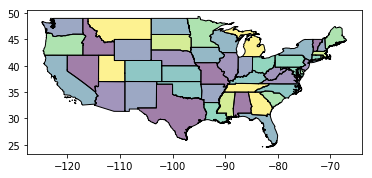

In [6]:
top = 51.3457868 # north lat
left = -124.7844079 # west long
right = -65.9513812 # east long
bottom =  20.7433195

bounds = [
            [
              left,
              bottom
            ],
            [
              right,
              bottom
            ],
            [
              right,
              top
            ],
            [
              left,
              top
            ],
            [
              left,
              bottom
            ]
]

# Turn the coordinates into a shapely polygon
statesbox = Polygon(bounds)


states = states[states.to_crs({'init': 'epsg:5071'}).within(statesbox)]
states.plot()

In [7]:
airquality = pd.read_csv('pm25_annual_fixed.csv')
points = airquality.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
airquality = gpd.GeoDataFrame(airquality, geometry=points)
airquality.crs = {'init': 'epsg:5071'}
airquality.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,geometry
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,5.7,3.8,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2017-05-18,POINT (-87.880258 30.497478)
1,1,27,1,88101,1,33.284928,-85.803608,NAD83,PM2.5 - Local Conditions,24 HOUR,...,8.7,2.9,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2017-05-18,POINT (-85.803608 33.284928)
2,1,33,1002,88101,1,34.762619,-87.638097,NAD83,PM2.5 - Local Conditions,24 HOUR,...,7.1,3.5,MUSCLE SHOALS,WILSON DAM RD AND 2ND ST.,Alabama,Colbert,Muscle Shoals,"Florence-Muscle Shoals, AL",2017-05-18,POINT (-87.638097 34.762619)
3,1,49,1003,88101,1,34.288567,-85.969858,NAD83,PM2.5 - Local Conditions,24 HOUR,...,8.2,4.2,CROSSVILLE,"13112 HWY.68 , CROSSVILLE AL. 35962",Alabama,DeKalb,Crossville,"Fort Payne, AL",2017-05-19,POINT (-85.969858 34.288567)
4,1,55,10,88101,1,33.991494,-85.992647,NAD83,PM2.5 - Local Conditions,24 HOUR,...,8.2,3.9,GADSDEN C. COLLEGE,"1001 WALLACE DRIVE, GADSDEN, AL 35902",Alabama,Etowah,Gadsden,"Gadsden, AL",2017-05-18,POINT (-85.99264699999998 33.991494)


In [8]:
top = 51.3457868 # north lat
left = -124.7844079 # west long
right = -65.9513812 # east long
bottom =  20.7433195

bounds = [
            [
              left,
              bottom
            ],
            [
              right,
              bottom
            ],
            [
              right,
              top
            ],
            [
              left,
              top
            ],
            [
              left,
              bottom
            ]
]

airqualitybox = Polygon(bounds)
airquality = airquality[airquality.to_crs({'init': 'epsg:5071'}).within(airqualitybox)]

# Make a map of power plants in the US, color coded by average air quality 

(-127.65372665000001,
 -64.059236349999992,
 23.280032899999998,
 50.627421099999999)

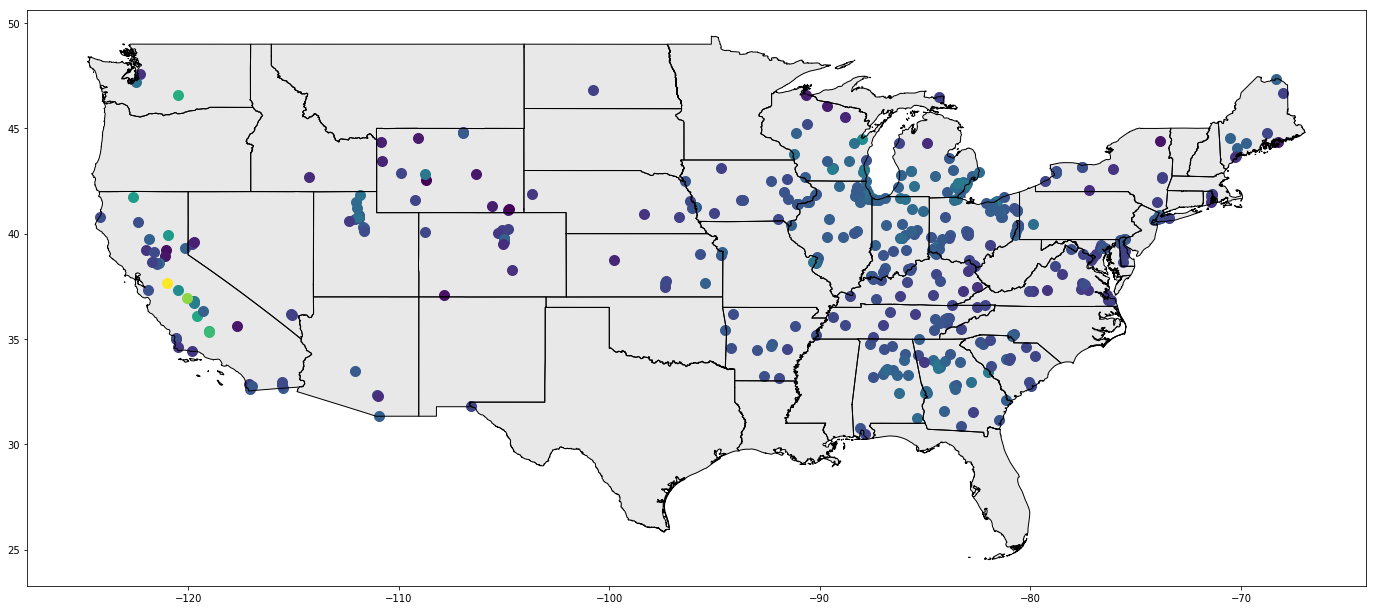

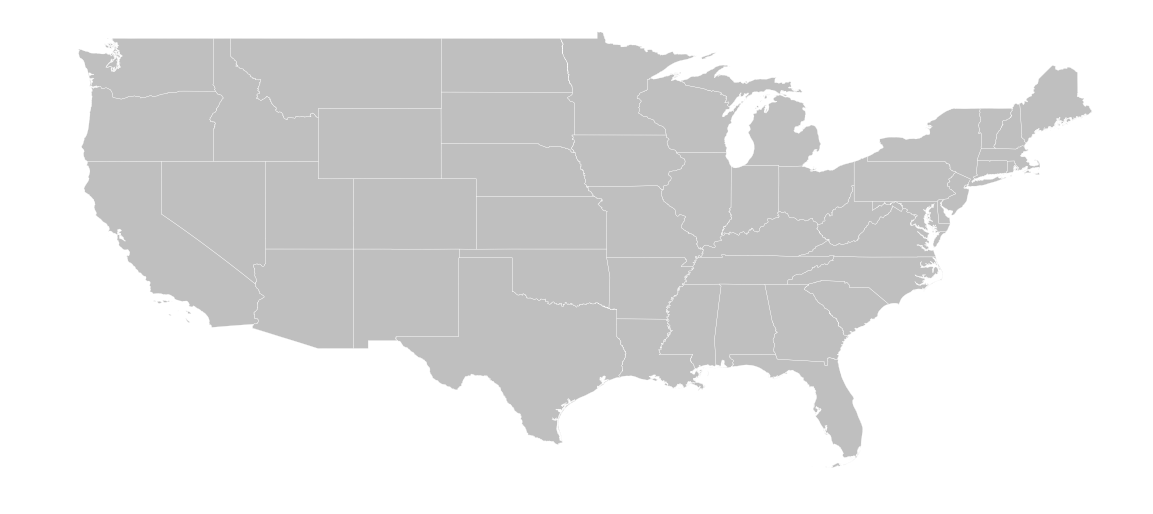

In [12]:
ax = airquality.plot(column='Arithmetic Mean',figsize=(24,24), markersize= 10)
states.plot(ax=ax, color='lightgrey', legend=True)
ax = states.plot(figsize=(20,20), color='grey', linewidth=0.25, edgecolor='white')
ax.axis('off')

# Make a map of air quality stations, color coded by worst air quality ever

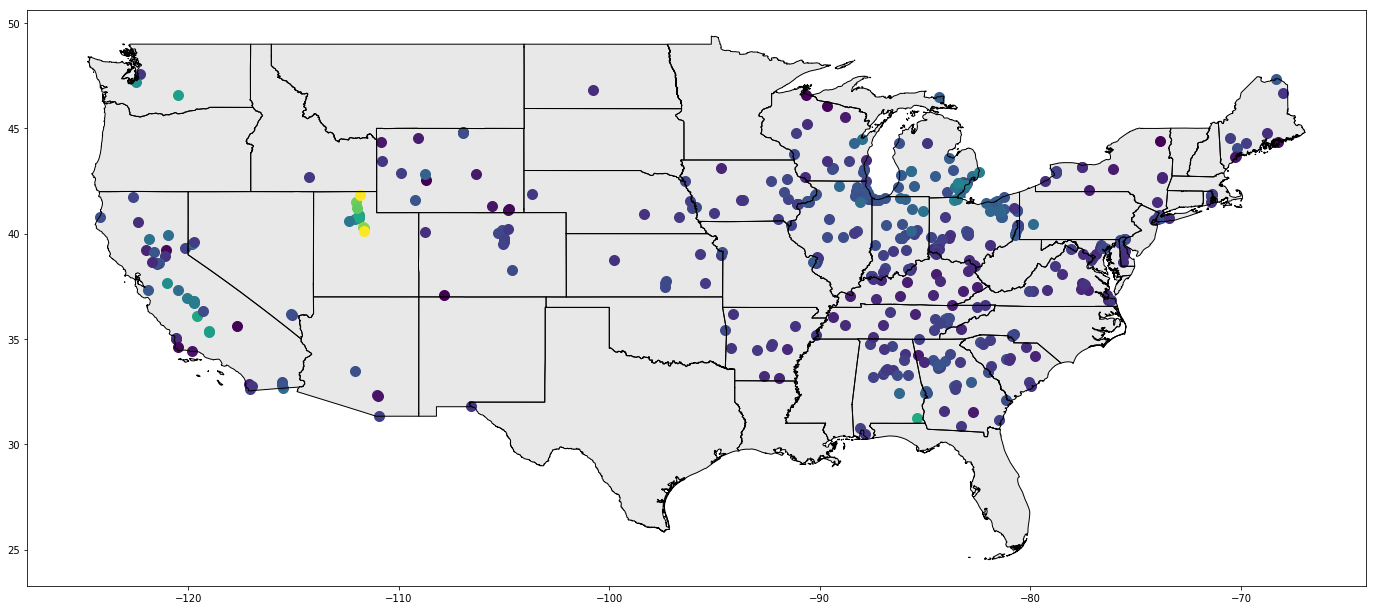

In [57]:
ax = airquality.plot(column='1st Max Value',figsize=(24,24), markersize= 10)
states.plot(ax=ax, color='lightgrey', legend=True)

# Map all of the nuclear power plants in red, with the rest of the plants as dark grey.

In [14]:
powerplants = pd.read_csv("powerplants.csv")
points = powerplants.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
powerplants = gpd.GeoDataFrame(powerplants, geometry=points)
powerplants.crs = {'init': 'epsg:5071'}
powerplants.head(30)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,...,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,...,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (-87.35682299999999 33.458665)
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,...,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300,POINT (-88.0103 31.0069)
2,4,Walter Bouldin Dam,Alabama Power Co,195,Electric Utility,Wetumpka,Elmore,36092,750 Bouldin Dam Road,hydroelectric,...,0.0,NaN,NaN,Hydroelectric = 225.9 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.583889,-86.283056,POINT (-86.283056 32.583889)
3,7,Gadsden,Alabama Power Co,195,Electric Utility,Gadsden,Etowah,35903,1000 Goodyear Ave,natural gas,...,0.0,NaN,NaN,Natural Gas = 130 MW,Natural Gas Steam Turbine,"EIA-860, EIA-860M and EIA-923",201607,34.012800,-85.970800,POINT (-85.9708 34.0128)
4,8,Gorgas,Alabama Power Co,195,Electric Utility,Parrish,Walker,35580,460 Gorgas Road,coal,...,0.0,NaN,NaN,Coal = 1034 MW,Conventional Steam Coal,"EIA-860, EIA-860M and EIA-923",201607,33.644344,-87.196486,POINT (-87.19648599999999 33.644344)
5,9,Copper,El Paso Electric Co,5701,Electric Utility,El Paso,El Paso,79915,651 Hawkins Blvd.,natural gas,...,0.0,NaN,NaN,Natural Gas = 62 MW,Natural Gas Fired Combustion Turbine,"EIA-860, EIA-860M and EIA-923",201607,31.756900,-106.375000,POINT (-106.375 31.7569)
6,10,Greene County,Alabama Power Co,195,Electric Utility,Demopolis,Greene,36732,Highway 43,natural gas,...,0.0,NaN,NaN,"Coal = 497 MW, Natural Gas = 740 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,32.601700,-87.781100,POINT (-87.7811 32.6017)
7,11,H Neely Henry Dam,Alabama Power Co,195,Electric Utility,Ohatchee,Calhoun,36271,1021 Ala Highway 144,hydroelectric,...,0.0,NaN,NaN,Hydroelectric = 70 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.784500,-86.052400,POINT (-86.05240000000001 33.7845)
8,12,Holt Dam,Alabama Power Co,195,Electric Utility,Tuscaloosa,Tuscaloosa,35476,12117 Power Plant Road,hydroelectric,...,0.0,NaN,NaN,Hydroelectric = 45 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.255300,-87.449500,POINT (-87.4495 33.2553)
9,13,Jordan Dam,Alabama Power Co,195,Electric Utility,Wetumpka,Elmore,36092,6150Jordan Dam Lane,hydroelectric,...,0.0,NaN,NaN,Hydroelectric = 100 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.618900,-86.254800,POINT (-86.2548 32.6189)


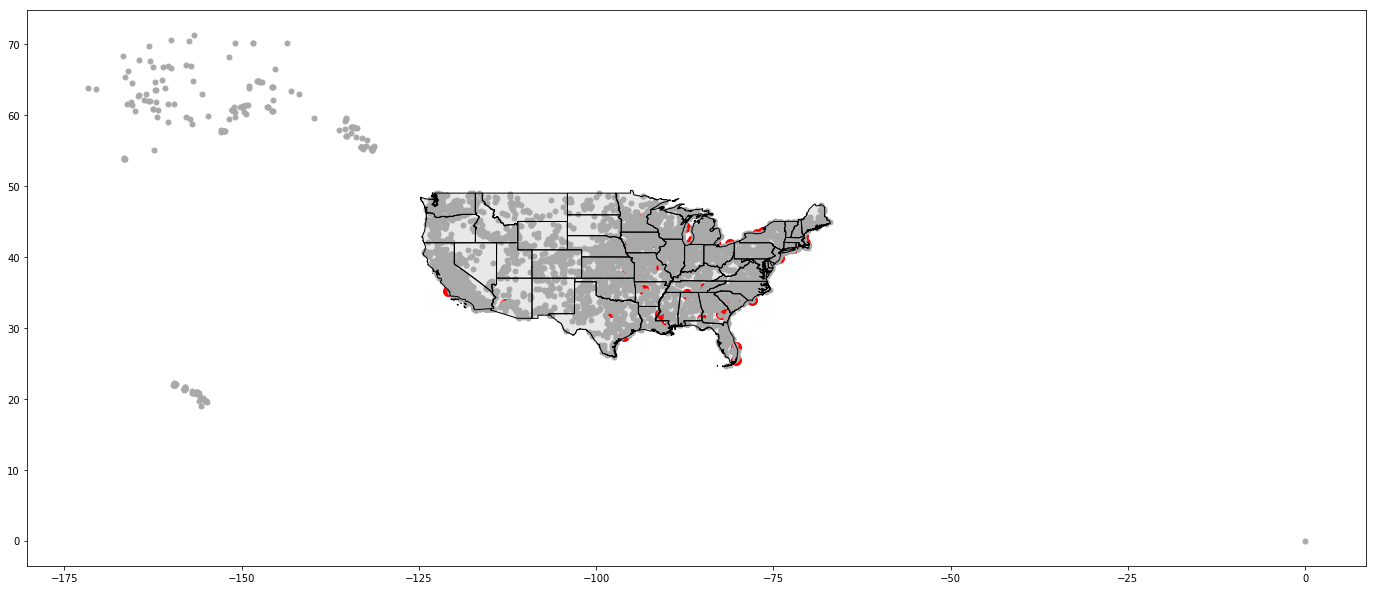

In [15]:
ax=powerplants[powerplants['PrimSource']=='nuclear'].plot(figsize=(24,24), markersize= 10, color='red')
powerplants[powerplants['PrimSource']!='nuclear'].plot(figsize=(24,24), markersize= 5, color='darkgrey',ax=ax)
states.plot(ax=ax, color='lightgrey', legend=True)

# Mapping Part Two- Spatial Joins

# How many power plants are in each state? 

In [16]:

powerplants_states = gpd.sjoin(powerplants, states, how='inner', op='within')
powerplants_states['NAME'].value_counts().head(10)

California        1222
North Carolina     461
Texas              396
New York           372
Minnesota          274
Massachusetts      254
Iowa               222
Michigan           219
Pennsylvania       207
New Jersey         207
Name: NAME, dtype: int64

# Which power plants are in New York? 

In [17]:
powerplants_states[powerplants_states['NAME'].str.contains('New York')].head()

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,...,index_right,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS
49,88,Ashokan,New York Power Authority,15296,Electric Utility,Kingston,Ulster,12401,Route 28A,hydroelectric,...,43,0400000US36,122053048985,19243095591,36,00,New York,36,01779796,NY
363,579,Central Hudson High Falls,Central Hudson Gas & Elec Corp,3249,Electric Utility,High Falls,ULSTER,12440,Route 213,hydroelectric,...,43,0400000US36,122053048985,19243095591,36,00,New York,36,01779796,NY
387,625,Upper Mechanicville,New York State Elec & Gas Corp,13511,Electric Utility,Town of Stillwater,Saratoga,12170,40 Hudson Avenue,hydroelectric,...,43,0400000US36,122053048985,19243095591,36,00,New York,36,01779796,NY
469,808,Jarvis (Hinckley),New York Power Authority,15296,Electric Utility,Hinckley,Oneida,13352,None,hydroelectric,...,43,0400000US36,122053048985,19243095591,36,00,New York,36,01779796,NY
1169,2480,Danskammer Generating Station,Danskammer Energy,58971,IPP Non-CHP,Newsburgh,Orange,12550,994 River Road,natural gas,...,43,0400000US36,122053048985,19243095591,36,00,New York,36,01779796,NY


# Which state has the most hydroelectric power plants?

In [18]:
hydroelectricPP = powerplants_states[powerplants_states['PrimSource'] == 'hydroelectric']

In [19]:
hydroelectricPP['NAME'].value_counts().head()

California    245
New York      159
Washington     77
Idaho          75
Oregon         60
Name: NAME, dtype: int64

# Which state produces the most energy from coal? 

In [20]:
powerplants_states.groupby('NAME')['Coal_MW'].sum().sort_values(ascending=False).head()

NAME
Texas           23588.5
Indiana         16111.4
Ohio            15189.9
Illinois        14644.6
Pennsylvania    13313.4
Name: Coal_MW, dtype: float64

# Map the states with nuclear power plants in red and the states with out in gray. Do the same thing for solar.

In [21]:
joined2 = gpd.sjoin(states, powerplants, how='inner', op='contains') #statewide

In [22]:
joined = gpd.sjoin(powerplants, states, how='inner', op='within')

In [23]:
joined2.geometry.head()

0    (POLYGON ((-88.053375 30.506987, -88.051087999...
0    (POLYGON ((-88.053375 30.506987, -88.051087999...
0    (POLYGON ((-88.053375 30.506987, -88.051087999...
0    (POLYGON ((-88.053375 30.506987, -88.051087999...
0    (POLYGON ((-88.053375 30.506987, -88.051087999...
Name: geometry, dtype: object

In [24]:
joined.geometry.head()

0    POINT (-87.35682299999999 33.458665)
1                POINT (-88.0103 31.0069)
2            POINT (-86.283056 32.583889)
3                POINT (-85.9708 34.0128)
4    POINT (-87.19648599999999 33.644344)
Name: geometry, dtype: object

In [25]:
joined.columns

Index(['Plant_Code', 'Plant_Name', 'Utility_Na', 'Utility_ID', 'sector_nam',
       'City', 'County', 'Zip', 'Street_Add', 'PrimSource', 'Total_MW',
       'Coal_MW', 'NG_MW', 'Crude_MW', 'Bio_MW', 'Hydro_MW', 'HydroPS_MW',
       'Nuclear_MW', 'Solar_MW', 'Wind_MW', 'Geo_MW', 'Other_MW', 'source_des',
       'tech_desc', 'Source', 'Period', 'Latitude', 'Longitude', 'geometry',
       'index_right', 'AFFGEOID', 'ALAND', 'AWATER', 'GEOID', 'LSAD', 'NAME',
       'STATEFP', 'STATENS', 'STUSPS'],
      dtype='object')

In [26]:
joined['NAME'].value_counts().head()

California        1222
North Carolina     461
Texas              396
New York           372
Minnesota          274
Name: NAME, dtype: int64

In [48]:
counts = joined['NAME'].value_counts()
counts.to_frame(name='count').head()

,count
California,1222
North Carolina,461
Texas,396
New York,372
Minnesota,274


In [49]:
states.merge(counts.to_frame(name='count'), left_on='NAME', right_index=True).head()

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry,count
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",72
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3...",113
3,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ...",55
4,0400000US06,403501101370,20466718403,06,00,California,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ...",1222
5,0400000US08,268429343790,1175112870,08,00,Colorado,08,01779779,CO,"POLYGON ((-109.060253 38.599328, -109.059541 3...",153


In [29]:
joined['NAME'].value_counts().head()

California        1222
North Carolina     461
Texas              396
New York           372
Minnesota          274
Name: NAME, dtype: int64

In [30]:
states.set_index('NAME').head()

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,STATEFP,STATENS,STUSPS,geometry
NAME,,,,,,,,,
Alabama,0400000US01,131173688951,4593686489,01,00,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
Arizona,0400000US04,294198560125,1027346486,04,00,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3..."
Arkansas,0400000US05,134771517596,2960191698,05,00,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ..."
California,0400000US06,403501101370,20466718403,06,00,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ..."
Colorado,0400000US08,268429343790,1175112870,08,00,08,01779779,CO,"POLYGON ((-109.060253 38.599328, -109.059541 3..."


In [31]:
indexed = states.set_index('NAME')
indexed['count'] = joined['NAME'].value_counts()
indexed.head()

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,STATEFP,STATENS,STUSPS,geometry,count
NAME,,,,,,,,,,
Alabama,0400000US01,131173688951,4593686489,01,00,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",72
Arizona,0400000US04,294198560125,1027346486,04,00,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3...",113
Arkansas,0400000US05,134771517596,2960191698,05,00,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ...",55
California,0400000US06,403501101370,20466718403,06,00,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ...",1222
Colorado,0400000US08,268429343790,1175112870,08,00,08,01779779,CO,"POLYGON ((-109.060253 38.599328, -109.059541 3...",153


In [32]:
indexed['solar_count'] = joined[joined.PrimSource == 'solar']['NAME'].value_counts()
indexed['solar_count'].fillna(value=0, inplace=True)
indexed.head()

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,STATEFP,STATENS,STUSPS,geometry,count,solar_count
NAME,,,,,,,,,,,
Alabama,0400000US01,131173688951,4593686489,01,00,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",72,0.0
Arizona,0400000US04,294198560125,1027346486,04,00,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3...",113,57.0
Arkansas,0400000US05,134771517596,2960191698,05,00,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ...",55,1.0
California,0400000US06,403501101370,20466718403,06,00,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ...",1222,390.0
Colorado,0400000US08,268429343790,1175112870,08,00,08,01779779,CO,"POLYGON ((-109.060253 38.599328, -109.059541 3...",153,31.0


In [33]:
indexed['solar_count_2'] = indexed['solar_count'] > 0

# solar plants statewide :

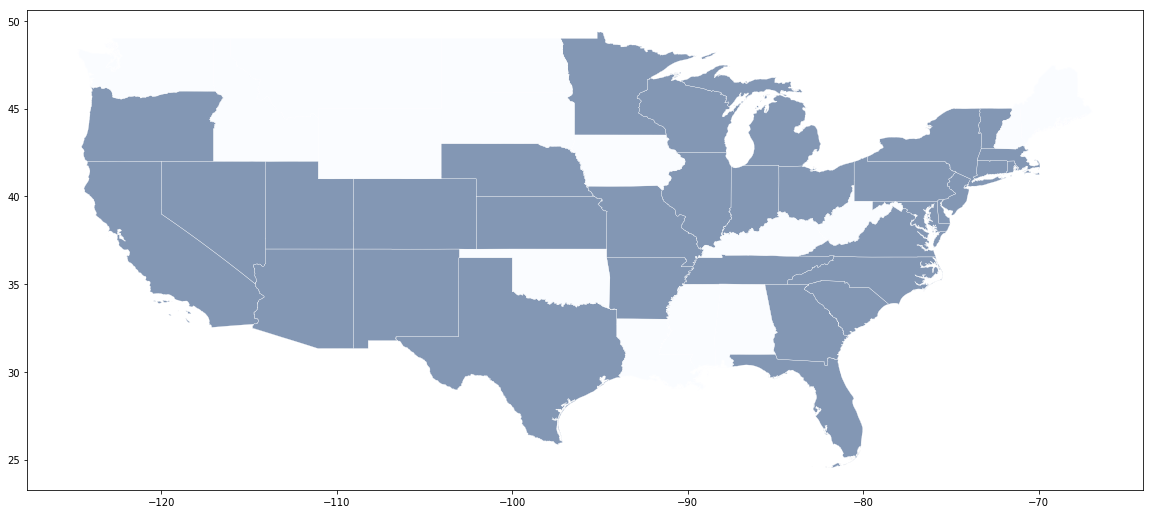

In [50]:
indexed.plot(column='solar_count_2', figsize= (20,20), linewidth=0.25, edgecolor='white', scheme='equal_interval', cmap='Blues')

In [35]:
indexed['nuclear_count'] = joined[joined.PrimSource == 'nuclear']['NAME'].value_counts()
indexed['nuclear_count'].fillna(value=0, inplace=True)
indexed.head(2)

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,STATEFP,STATENS,STUSPS,geometry,count,solar_count,solar_count_2,nuclear_count
NAME,,,,,,,,,,,,,
Alabama,0400000US01,131173688951,4593686489,01,00,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",72,0.0,False,2.0
Arizona,0400000US04,294198560125,1027346486,04,00,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3...",113,57.0,True,1.0


In [36]:
indexed['nuclear_count_2'] = indexed['nuclear_count'] > 0

# nuclear power plants across the country 

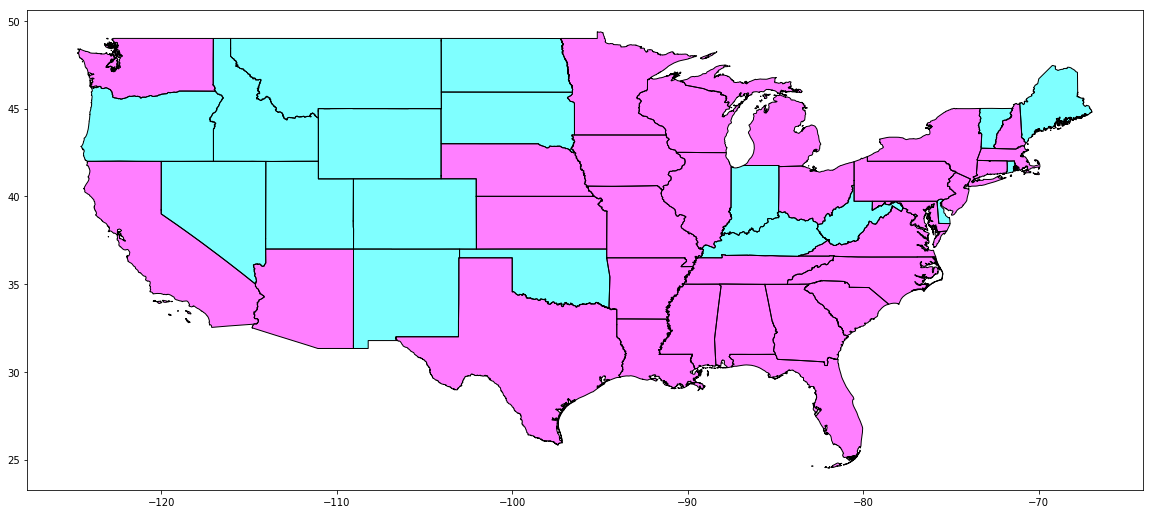

In [69]:
indexed.plot(column='nuclear_count_2', figsize= (20,20), cmap='cool')

# for solar power with actual powerplants

In [54]:
solarpower = powerplants_states[powerplants_states['PrimSource'] == 'solar']

In [55]:
nosolarpower = powerplants_states[~powerplants_states['PrimSource'].isin(['solar'])]

(-127.65372665000001,
 -64.059236349999992,
 23.280032899999998,
 50.627421099999999)

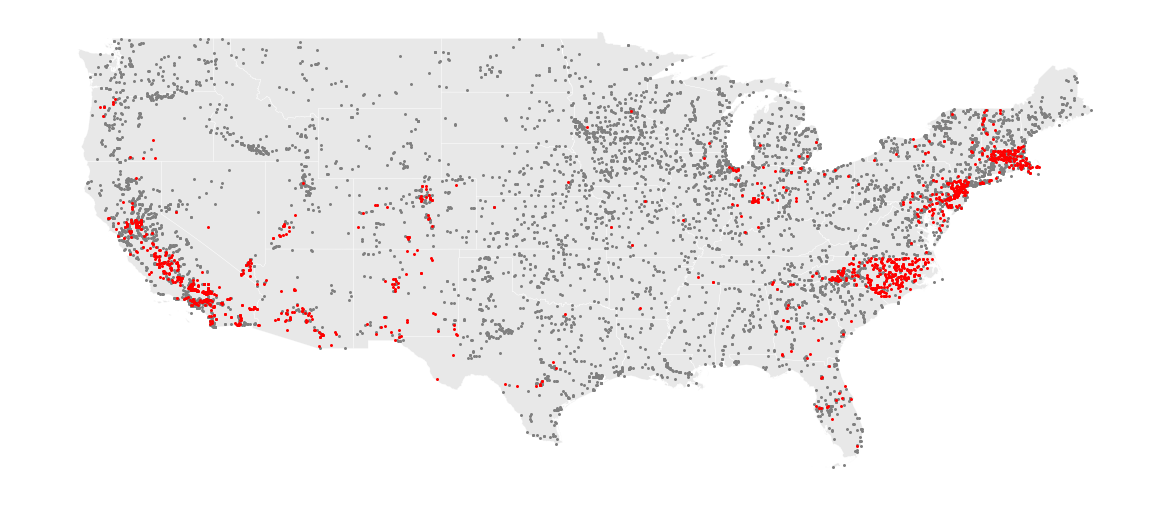

In [56]:
ax = states.plot(figsize=(20,20), color='lightgrey', linewidth=0.25, edgecolor='white')
nosolarpower.plot(color='grey', ax=ax, markeredgewidth=0, markersize=3)
solarpower.plot(color='red', ax=ax, markeredgewidth=0, markersize=3)
ax.axis('off')

# Make a map of carbon dioxide emissions by state, with low emissions being light orange 
# and high emissions being orange.

In [58]:
carbon_emissions = pd.read_csv('Total Carbon Dioxide Emissions-StateRankings.csv')

In [59]:
carbon_emissions.head()

,Rank,State,"Total Carbon Dioxide Emissions, million metric tons",Note: Rankings are based on the full source data values.
0,1,TX,642.0,NaN
1,2,CA,358.0,NaN
2,3,PA,245.0,NaN
3,4,IL,234.0,NaN
4,5,OH,232.0,NaN


In [60]:
joined_emission = states.merge(carbon_emissions, left_on='STUSPS', right_on='State')
joined_emission.head(2)

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry,Rank,State,"Total Carbon Dioxide Emissions, million metric tons",Note: Rankings are based on the full source data values.
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",15,AL,123.0,NaN
1,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3...",23,AZ,93.0,NaN


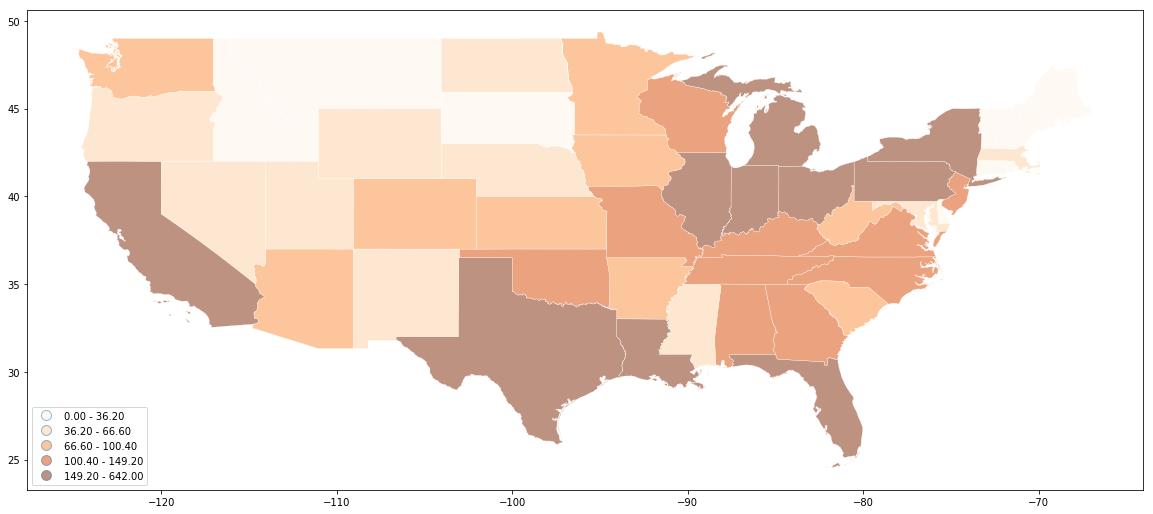

In [61]:
joined_emission.plot(figsize= (20,20),column='Total Carbon Dioxide Emissions, million metric tons', cmap='Oranges', linewidth=0.25, edgecolor='white', legend=True, scheme='Quantiles')

# Make a map of total solar energy produced by each state, 
# with little being a light color and high emissions being a brighter/darker color.

In [63]:

merged_total = joined_emission.merge(joined, left_on='STUSPS', right_on='STUSPS')
merged_total.head()
merged_total.columns
solar_energy = merged_total.groupby('NAME_y')['Solar_MW'].sum().sort_values(ascending=False)
solar_energy.head()

NAME_y
California        8146.9
North Carolina    1700.9
Arizona           1568.5
Nevada            1129.1
Georgia            471.3
Name: Solar_MW, dtype: float64

In [65]:
indexed['Total Solar'] = solar_energy
indexed['Total Solar'].fillna(value=0, inplace=True)

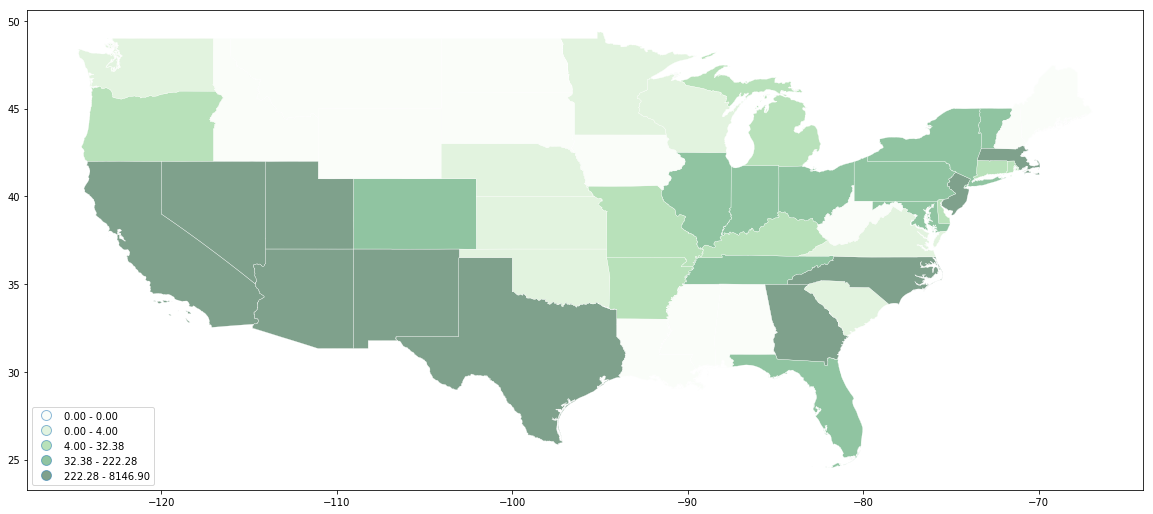

In [66]:
indexed.plot(figsize= (20,20), column='Total Solar', cmap='Greens', linewidth=0.25, edgecolor='white', legend=True, scheme='Quantiles')

# Which power plants are within 75 miles of New York City?

In [72]:
powerplants.columns

Index(['Plant_Code', 'Plant_Name', 'Utility_Na', 'Utility_ID', 'sector_nam',
       'City', 'County', 'Zip', 'Street_Add', 'PrimSource', 'Total_MW',
       'Coal_MW', 'NG_MW', 'Crude_MW', 'Bio_MW', 'Hydro_MW', 'HydroPS_MW',
       'Nuclear_MW', 'Solar_MW', 'Wind_MW', 'Geo_MW', 'Other_MW', 'source_des',
       'tech_desc', 'Source', 'Period', 'Latitude', 'Longitude', 'geometry'],
      dtype='object')

In [73]:
NYC = powerplants[powerplants['City'] =='New York']

In [74]:
NYC.to_crs({'proj' : 'merc'})

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,...,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry
1176,2493,East River,Consolidated Edison Co-NY Inc,4226,Electric Utility,New York,New York,10009,801 East 14th Street,natural gas,...,0.0,NaN,NaN,Natural Gas = 629.3 MW,Natural Gas Steam Turbine; Natural Gas Fired C...,"EIA-860, EIA-860M and EIA-923",201607,40.728100,-73.974200,POINT (-10686749.93423735 2615374.706860851)
1178,2496,Hudson Avenue,Consolidated Edison Co-NY Inc,4226,Electric Utility,New York,Kings,11201,1-11 Hudson Avenue,petroleum,...,0.0,NaN,NaN,Petroleum = 41.7 MW,Petroleum Liquids,"EIA-860, EIA-860M and EIA-923",201607,40.705200,-73.980700,POINT (-10686749.94116279 2615374.681521415)
1182,2503,59th Street,Consolidated Edison Co-NY Inc,4226,Electric Utility,New York,New York,10019,850 12th Avenue,natural gas,...,0.0,NaN,NaN,Natural Gas = 14.9 MW,Natural Gas Fired Combustion Turbine,"EIA-860, EIA-860M and EIA-923",201607,40.771285,-73.991150,POINT (-10686749.95229759 2615374.754645912)
1183,2504,74th Street,Consolidated Edison Co-NY Inc,4226,Electric Utility,New York,New York,10021,506 E 75th Street,petroleum,...,0.0,NaN,NaN,Petroleum = 37.7 MW,Petroleum Liquids,"EIA-860, EIA-860M and EIA-923",201607,40.768000,-73.951500,POINT (-10686749.91005125 2615374.751011317)
3179,50427,Bronx Zoo,New York Zoological Society,13487,Commercial CHP,New York,Bronx,10460,2300 Southern Blvd,natural gas,...,0.0,NaN,NaN,Natural Gas = 3.6 MW,Natural Gas Internal Combustion Engine,"EIA-860, EIA-860M and EIA-923",201607,40.844114,-73.876888,POINT (-10686749.83055421 2615374.835233843)
3508,52168,Riverbay,Riverbay Corp,24210,Commercial CHP,New York,Bronx,10475,98 Co-op City Blvd.,natural gas,...,0.0,NaN,NaN,"Natural Gas = 36 MW, Petroleum = 1.5 MW",Natural Gas Fired Combustion Turbine; Natural ...,"EIA-860, EIA-860M and EIA-923",201607,40.869972,-73.824437,POINT (-10686749.77466889 2615374.863846756)
3815,54808,New York University Central Plant,New York University,13491,Commercial CHP,New York,New York,10012,251 Mercer Street,natural gas,...,0.0,NaN,NaN,"Natural Gas = 12.8 MW, Petroleum = 4.2 MW",Natural Gas Fired Combined Cycle; Petroleum Li...,"EIA-860, EIA-860M and EIA-923",201607,40.789900,-73.923300,POINT (-10686749.88000487 2615374.775244406)
4138,55375,Astoria Energy,Astoria Energy LLC,22979,IPP Non-CHP,New York,Queens,11105,17-10 Steinway Street,natural gas,...,0.0,NaN,NaN,Natural Gas = 540 MW,Natural Gas Fired Combined Cycle,"EIA-860, EIA-860M and EIA-923",201607,40.782500,-73.896400,POINT (-10686749.85134338 2615374.767056357)
5760,57789,Peak Power 1 Cogen,"Peak Power 1, LLC",57106,Commercial CHP,New York,New York,10119,One Penn Plaza,natural gas,...,0.0,NaN,NaN,Natural Gas = 6 MW,Natural Gas Internal Combustion Engine,"EIA-860, EIA-860M and EIA-923",201607,40.751111,-73.991667,POINT (-10686749.95284829 2615374.73232291)
5768,57798,OBP Cogen,OBP Cogen LLC,57120,Commercial CHP,New York,New York,10036,One Bryant Park,natural gas,...,0.0,NaN,NaN,Natural Gas = 4.6 MW,Natural Gas Fired Combustion Turbine,"EIA-860, EIA-860M and EIA-923",201607,40.754865,-73.983248,POINT (-10686749.94387803 2615374.736476871)
